In [1]:

import time
import pandas as pd
import glob
import numpy as np
import timeit
import pickle

from multiprocessing import Pool
from matplotlib import pyplot as plt
def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
start_time = timeit.default_timer()

# import matplotlib.pyplot as plt

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
#matplotlib.rcParams.update({'font.size': 18})

path_dicts='/mnt/sdb1/sandeep/dicts_chess/'

In [2]:
YEAR_OF_PGN=2017
MONTH_OF_PGN=1
if MONTH_OF_PGN<10: MONTH_OF_PGN='0'+str(MONTH_OF_PGN)
    
t_ic=time.time()
file_to_read = open(path_dicts+"dict_lichess_db_standard_rated_"+str(YEAR_OF_PGN)+"-"+str(MONTH_OF_PGN)+".pkl", "rb")
dict_career_MAIN = pickle.load(file_to_read)


t_oc=time.time()
print(t_oc-t_ic)
                    


70.74475646018982


In [3]:
t_ic=time.time()

for MONTH_OF_PGN in range(2,13):
    if MONTH_OF_PGN<10: MONTH_OF_PGN='0'+str(MONTH_OF_PGN)

    file_to_read = open(path_dicts+"dict_lichess_db_standard_rated_"+str(YEAR_OF_PGN)+"-"+str(MONTH_OF_PGN)+".pkl", "rb")
    dict_career= pickle.load(file_to_read)


    it_career=0
    LL=len(dict_career.keys())
    for key_ in dict_career.keys():
        it_career=it_career+1
        career_=dict_career[key_]

        if key_ in dict_career_MAIN.keys():
            dict_career_MAIN[key_]=dict_career_MAIN[key_]+career_
        else:
            dict_career_MAIN.setdefault(key_, []).append(career_)

        if it_career % 5000 == 0:
            t_oc = time.time();
            print('MONTH=',MONTH_OF_PGN,'-----',it_career/LL)
            with open("/mnt/sdb1/sandeep/0. Careers in chess/b_PROG_MERGING_"+str(YEAR_OF_PGN)+".txt", "a") as file_object:
                file_object.write('Y='+str(YEAR_OF_PGN)+'-MONTH='+str(MONTH_OF_PGN)+'--'+str(it_career/LL)+'--i.e.-'+str(it_career)+'/'+str(LL)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')

# print(t_oc-t_ic)
#----------------------------------------------------
# Writing dictionary to file 
#----------------------------------------------------       
with open("/mnt/sdb1/sandeep/0. Careers in chess/b_PROG_MERGING_"+str(YEAR_OF_PGN)+".txt", "a") as file_object:
    file_object.write('writing dict to file ------------\n')

file_write=path_dicts+"dict_merged_"+str(YEAR_OF_PGN)+".pkl"
with open(file_write, 'wb') as f:
    pickle.dump(dict_career_MAIN, f, pickle.HIGHEST_PROTOCOL)
with open("/mnt/sdb1/sandeep/0. Careers in chess/b_PROG_MERGING_"+str(YEAR_OF_PGN)+".txt", "a") as file_object:
    file_object.write('done writing dict to file ------------\n')

t_oc=time.time();
print(t_oc-t_ic,' seconds')

MONTH= 02 ----- 0.022300024530026982
MONTH= 02 ----- 0.044600049060053965
MONTH= 02 ----- 0.06690007359008095
MONTH= 02 ----- 0.08920009812010793
MONTH= 02 ----- 0.11150012265013491
MONTH= 02 ----- 0.1338001471801619
MONTH= 02 ----- 0.1561001717101889
MONTH= 02 ----- 0.17840019624021586
MONTH= 02 ----- 0.20070022077024285
MONTH= 02 ----- 0.22300024530026982
MONTH= 02 ----- 0.24530026983029682
MONTH= 02 ----- 0.2676002943603238
MONTH= 02 ----- 0.2899003188903508
MONTH= 02 ----- 0.3122003434203778
MONTH= 02 ----- 0.3345003679504047
MONTH= 02 ----- 0.3568003924804317
MONTH= 02 ----- 0.3791004170104587
MONTH= 02 ----- 0.4014004415404857
MONTH= 02 ----- 0.4237004660705127
MONTH= 02 ----- 0.44600049060053965
MONTH= 02 ----- 0.46830051513056664
MONTH= 02 ----- 0.49060053966059364
MONTH= 02 ----- 0.5129005641906206
MONTH= 02 ----- 0.5352005887206476
MONTH= 02 ----- 0.5575006132506746
MONTH= 02 ----- 0.5798006377807016
MONTH= 02 ----- 0.6021006623107286
MONTH= 02 ----- 0.6244006868407556
MONTH=

MemoryError: 

In [ ]:
LL
100000
893876

In [23]:
t_ic=time.time()
dict_temporary_={}
it_career=0;
LL=len(dict_career_MAIN.keys())
#----------------------------------------------------
# Writing dictionary to file 
#----------------------------------------------------       
import json

counter_file=0
for key_ in dict_career_MAIN.keys():
    career_=dict_career_MAIN[key_].copy();
    dict_temporary_.setdefault(key_, []).append(career_)
    it_career=it_career+1
    if it_career % 8000 == 0 or it_career==LL:
        counter_file=counter_file+1
        t_oc = time.time();
        print('it_career=',it_career,'-----',it_career/LL)
#         with open("/mnt/sdb1/sandeep/0. Careers in chess/b_writing_PROG_MERGING_"+str(YEAR_OF_PGN)+".txt", "a") as file_object:
#             file_object.write('Y='+str(YEAR_OF_PGN)+'--'+str(it_career/LL)+'--i.e.-'+str(it_career)+'/'+str(LL)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')



        file_write=path_dicts+"dict_merged_"+str(YEAR_OF_PGN)+"_"+str(counter_file)+".txt"
        with open(file_write, 'w') as convert_file:
             convert_file.write(json.dumps(dict_temporary_))
#         file_write=path_dicts+"dict_merged_"+str(YEAR_OF_PGN)+"_"+str(counter_file)+".pkl"
       
#         with open(file_write, 'wb') as f:
#             pickle.dump(dict_temporary_, f, pickle.HIGHEST_PROTOCOL)
        dict_temp={}

# print(t_oc-t_ic)

t_oc=time.time();
print(t_oc-t_ic,' seconds')

it_career= 8000 ----- 0.008949787218808873


KeyboardInterrupt: 

In [6]:
#----------------------------------------------------
# Writing dictionary to file 
#----------------------------------------------------       
with open("/mnt/sdb1/sandeep/0. Careers in chess/b_PROG_MERGING_"+str(YEAR_OF_PGN)+".txt", "a") as file_object:
    file_object.write('writing dict to file ------------\n')

file_write=path_dicts+"dict_merged_"+str(YEAR_OF_PGN)+".pkl"
with open(file_write, 'wb') as f:
    pickle.dump(dict_career_MAIN, f, pickle.HIGHEST_PROTOCOL)
with open("/mnt/sdb1/sandeep/0. Careers in chess/b_PROG_MERGING_"+str(YEAR_OF_PGN)+".txt", "a") as file_object:
    file_object.write('done writing dict to file ------------\n')

t_oc=time.time();
print(t_oc-t_ic,' seconds')

MemoryError: 

In [22]:
len(dict_temp.keys())
import sys
print(sys.getsizeof(dict_temp)/1024,sys.getsizeof(dict_career_MAIN)/1024/1024)

0.0625 40.000091552734375


In [5]:
cc=0;
for key_ in dict_career_MAIN.keys():
    print(key_); cc=cc+1
    if cc>5:    break

cronopiodano
Magnataroniell
MarlonTeixeira21
caguertti
WinterSnowStorm
theivi


In [ ]:
len(dict_career_MAIN.keys())

In [ ]:
len(dict_career.keys())

In [75]:
# how_many_=0
# for key_ in dict_career.keys():
#     how_many_=how_many_+int(key_ in dict_career_MAIN.keys())
# how_many_

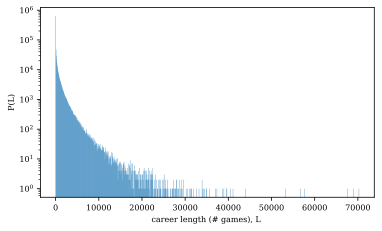

In [4]:

career_len=[]
cc=0
for key_ in dict_career_MAIN:
    career_len.append(len((dict_career_MAIN[key_])))
#     cc=cc+1; 
#     if cc>10: break;

fig = plt.figure(0,figsize=(6, 3.5));
ax = fig.add_subplot(1, 1, 1);
ax.hist(career_len,1000);

# ax.legend(store_lines,leg_,loc=(1.04,0));
ax.set(xlabel="career length (# games), L ", ylabel='P(L)');
ax.set_yscale('log',base=10)

# ax.set_xticks(xtick_s)
# ax.set_xlim(1,100);